In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import itertools

In [3]:
def return_axis(Ne, Ni, NOISE_MAX):
    # GLOBAL PARAMETERS THAT SET OUR NEURON MODEL
    re = np.random.rand(Ne, 1)
    ri = np.random.rand(Ni, 1)
    a = np.concatenate((0.02 * np.ones((Ne, 1)), 0.02 + 0.08 * ri))
    b = np.concatenate((0.2 * np.ones((Ne, 1)), 0.25 - 0.05 * ri))
    c = np.concatenate((-65 + 15 * re**2, -65 * np.ones((Ni, 1))))
    d = np.concatenate((8 - 6 * re**2, 2 * np.ones((Ni, 1))))

    # SET frac_delete
    frac_delete = 0.6

    # SET MAT_EXC_WEIGHT, MAX_INH_WEIGHT
    MAX_EXC_WEIGHT, MAX_INH_WEIGHT = 1, 0.5
    

    # SET UP THE CONNECTIVITY MATRIX
    A = np.random.rand(Ne+Ni, Ne+Ni)
    A[A < frac_delete] = 0
    A[A > 0] = 1
    np.fill_diagonal(A, 0)

    # SET SYNAPTIC WEIGHTS OF CONNECTIONS
    W = np.hstack((MAX_EXC_WEIGHT * np.random.rand(Ne+Ni, Ne), -MAX_INH_WEIGHT * np.random.rand(Ne+Ni, Ni)))

    # The final connectivity matrix S
    S = A * W

    # MAIN SIMULATION
    v = -65 * np.ones((Ne+Ni, 1))
    u = b * v
    firings = []

    for t in range(1, 1001):
        I = np.concatenate((NOISE_MAX * np.random.randn(Ne, 1), 2 * np.random.randn(Ni, 1)))
        fired = np.where(v >= 30)[0]
        firings.extend(list(zip([t]*len(fired), fired)))
        v[fired] = c[fired]
        u[fired] = u[fired] + d[fired]
        I = I + np.sum(S[:,fired], axis=1).reshape(-1,1)
        for _ in range(2):  # step 0.5 ms for numerical stability
            v = v + 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
        u = u + a * (b * v - u)

    firings = np.array(firings)

    return firings[:,0], firings[:,1]

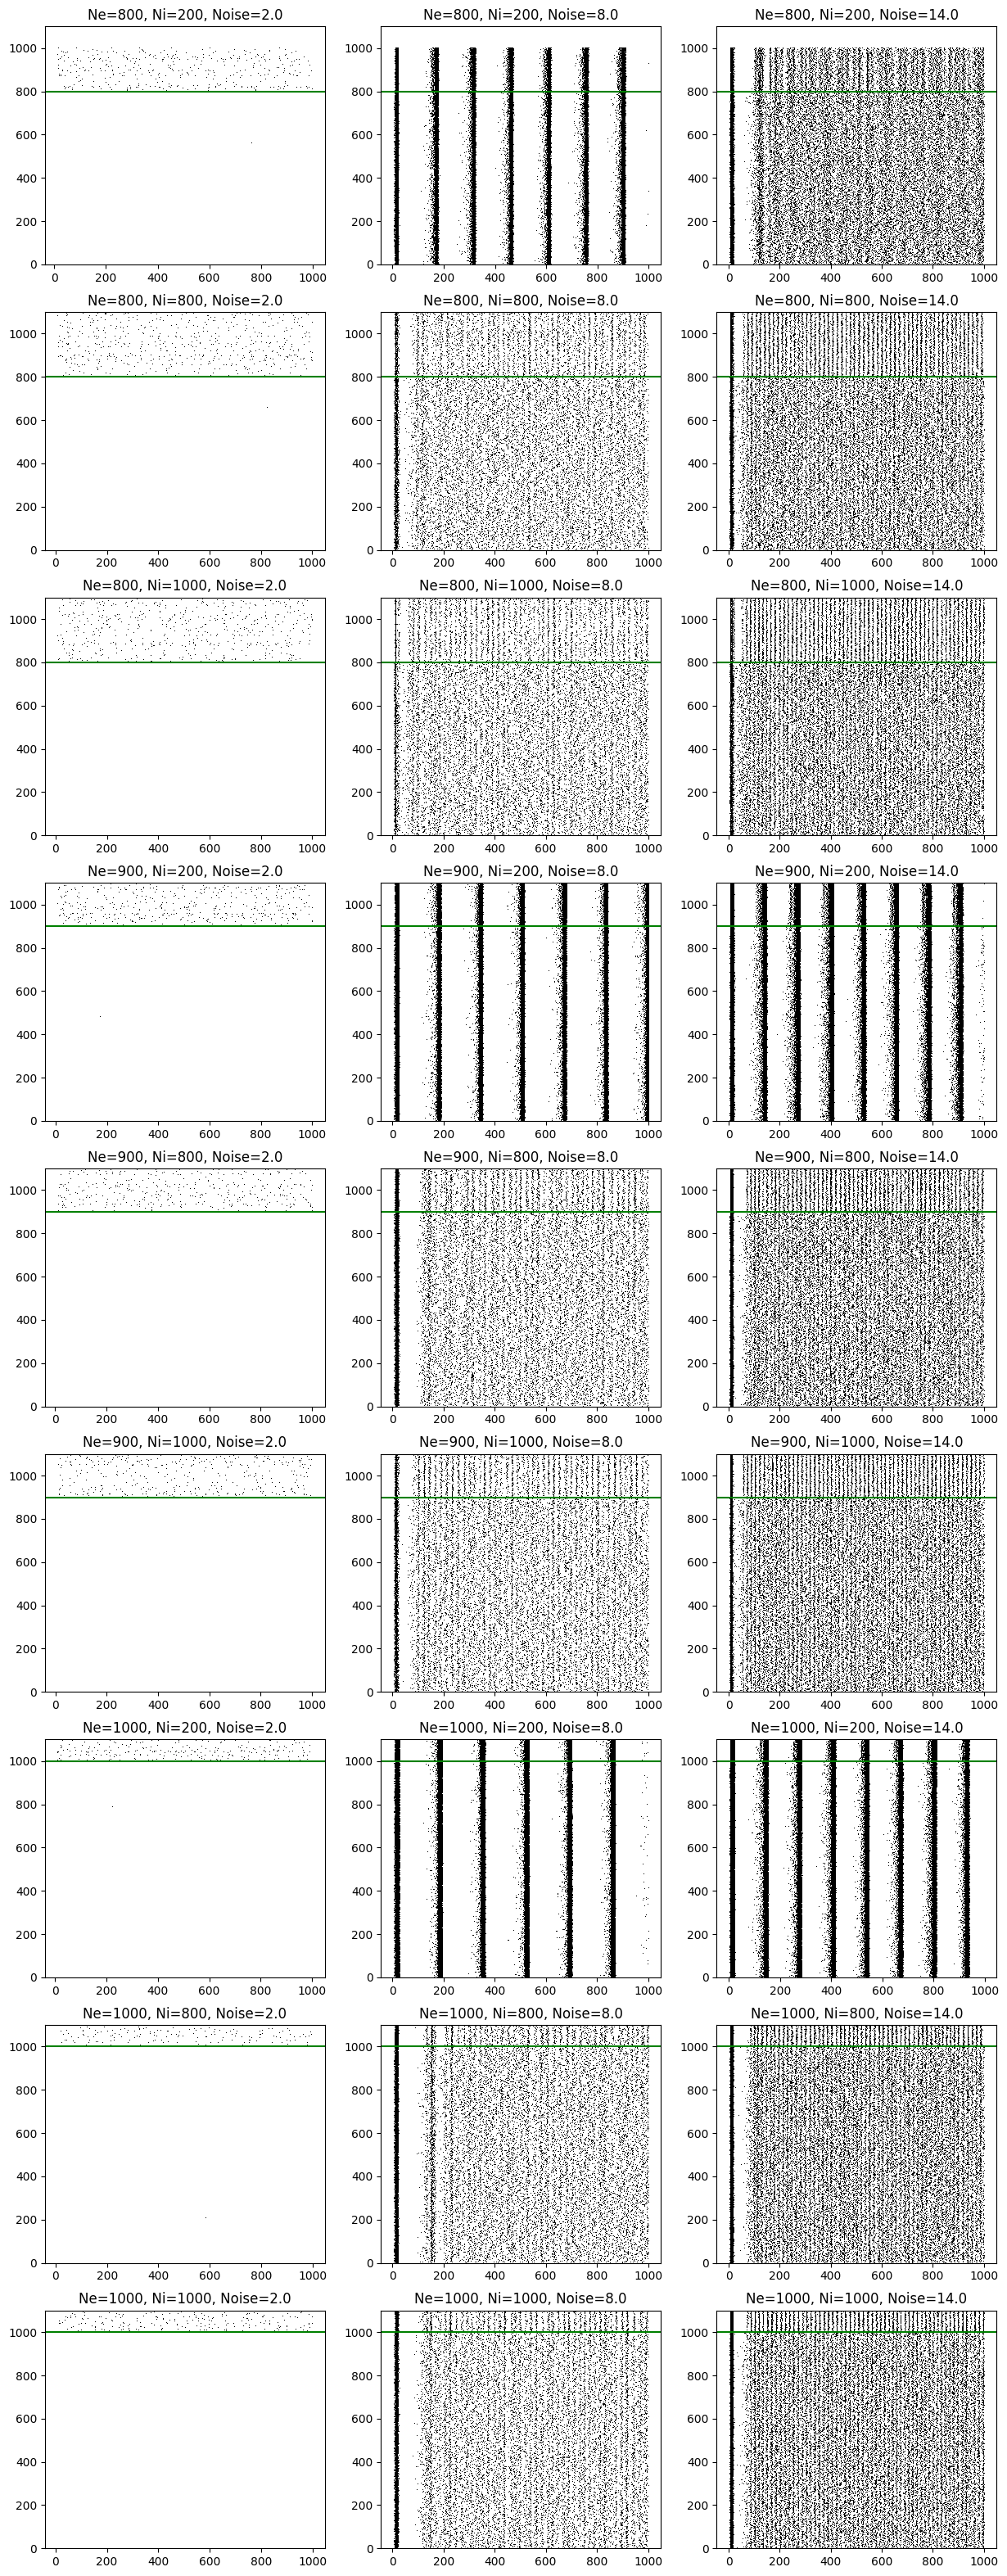

In [17]:
ni = [800, 900, 1000]

ne = [200, 800, 1000]

noises = [2.0, 8.0, 14.0]

combinacoes = list(itertools.product(ni, ne, noises))

fig, axs = plt.subplots(9,3)
fig.set_size_inches(15, 40)

ind = 0

for ind, ax in enumerate(axs.flat):
    times, spikes = return_axis(combinacoes[ind][0], combinacoes[ind][1], combinacoes[ind][2])
    ax.set_title(f'Ne={combinacoes[ind][0]}, Ni={combinacoes[ind][1]}, Noise={combinacoes[ind][2]}')
    ax.plot(times, spikes, ',k')
    ax.set_ylim(0,1100)
    ax.axhline(combinacoes[ind][0], color ='green')